# Vitesse de sédimentation : 
## Résolution en transitoire et en l'absence de diffusion

Pour déterminer la vitesse de chute d'une particule de rayon, R, dans un fluide de viscosité $\mu$, il faut faire un bilan de force sur la particule :
$$\sum \vec{F}= m \vec{a}$$
En considérant la force de gravité, la poussée d'Archimède et la force de traînée (donnée par la lode Stokes pour un écoulement laminaire qui doit vérifier $Re=\frac{\rho_f u 2 R}{\mu} < 1$), le bilan de force s'écrit alors :
$$V_p(\rho_p-\rho_f)g-6\pi\mu R u=V_p\rho_p\frac{du}{dt}$$
où $\rho_p$ et $\rho_f$ représentent la masse volumique de la particule et du fluide respectivement et $V_p$ le volume de la particule..

Il faut donc résoudre l'équation différentielle suivante :
$$V_p\rho_p\frac{du}{dt}+6\pi\mu R u=V_p(\rho_p-\rho_f)g$$
Une solution particulière à cette équation différentielle est la vitesse limite obtenue quand l'accélération est nulle et donc $\frac{du}{dt}=0$. La vitesse limite est égale à :
$$ u_{lim}=\frac{2 R^2}{9 \mu}(\rho_p-\rho_f)g$$
Pour simplifier l'équation, on peut introduire des variables sans dimensions  :
$$u^*=\frac{u}{u_{lim}}$$
$$t^*=\frac{6\pi\mu R}{V_p\rho_p}t=\frac{9 \mu}{\rho_p 2 R^2}t $$
L'équation différentielle s'écrit alors :
$$\frac{du^*}{dt^*}+u^*=1$$

>Essayez par vous-même d'adimensionnaliser l'équation et vérifiez les dimensions de $t^*$ par exemple 

La solution générale à l'équation différente $\frac{du^*}{u^*}=-dt^*$ est :
$$u^*=Ke^{-t^*}$$
La solution particulière à cette équation est :
$$u^*=1$$
La solution à l'équation est donc :
$$u^*=Ke^{-t^*}+1$$
En appliquant la conditions initiale, $u^*=0$ quand $t^*=0$, on peut déterminer la valeur de la constante, $k$, et obtenir la relation pour la vitesse en fonction du temps :
$$u^*=1-e^{-t^*}$$
On peut définir le temps au bout duquel la vitesse a atteint 99% de sa valeur finale, $u^*=0.99$ :
$$t^*=-ln(0.01)$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

a=1e-4 #m
rhop=2000 #kg m-3
rhof=1000 #kg m-3
g=9.81 #m s-2
mu=0.01 #Pa s



vp=4*np.pi*(a**3)/3

ulim=2*(a**2)*(rhop-rhof)*g/(9*mu)

Re=rhof*ulim*2*a/mu
if Re>1 :
    print ('Attention, le résultat est FAUX car la loi de Stokes ne s\'appplique pas')
print ('le nombre de Reynolds est de :',Re)

print ('la vitesse limite sera de :', ulim, 'm/s')



le nombre de Reynolds est de : 0.043600000000000014
la vitesse limite sera de : 0.0021800000000000005 m/s


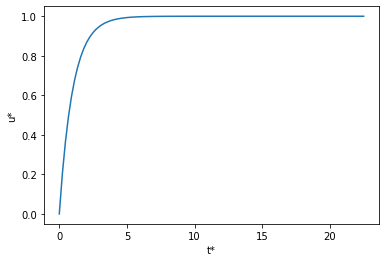

 On aura atteint 99.9  % de la valeur limite pour un temps de 0.0030701134573253943 s


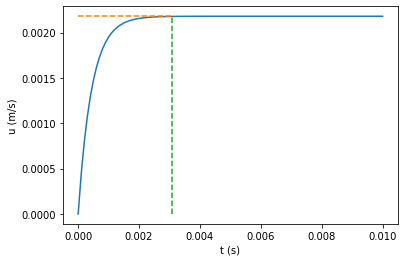

In [9]:
tdim=2*(a**2)*rhop/(9*mu)
t=np.linspace(0,0.01,101)
t_star=t/tdim

u_star=1-np.exp(-t_star)
u_pc=0.999

plt.plot(t_star, u_star)
plt.xlabel('t*')
plt.ylabel('u*')
plt.show()
plt.plot(t_star*tdim,u_star*ulim)
plt.plot([0,-np.log(1.-u_pc)*tdim], [u_pc*ulim,u_pc*ulim ],'--')
plt.plot([-np.log(1.-u_pc)*tdim,-np.log(1.-u_pc)*tdim], [0,u_pc*ulim ],'--')
plt.xlabel('t (s)')
plt.ylabel('u (m/s)')

print (' On aura atteint', u_pc*100,' % de la valeur limite pour un temps de', -np.log(1.-u_pc)*tdim, 's')